In [74]:
import numpy as np
import xmlTranslator as xmlT
from ipywidgets import FloatProgress
from tqdm import tqdm
import importlib
from utils import get_project_root

TODO: 
- Repeat the sequences 3 times
- Extend all chords into the chromatic scale
- Complete the voicing as a MIDI array 
- Fix the style token
- Split into train and test
- Pass the MIDI into Embeddings

In [ ]:
directory = '/data/iRealXML'
root = get_project_root()
myPath = str(root) + str(directory)

theChordDataset, theDurationsDataset, all_meta = xmlT.parse_info_from_XML(myPath)

  0%|          | 0/4006 [00:00<?, ?it/s]

 24%|██▍       | 974/4006 [00:02<00:08, 368.64it/s]

In [30]:
def print_this_song(meta, dataset, id):
    print(meta[id])
    for i, e in enumerate(dataset[id]):
        print(i, e)
    print('')

In [31]:
#Correct the location of 'e||'
dataset = []
dataset_durations = []
for i, song in enumerate(theChordDataset):
    d = theDurationsDataset[i]
    song, durations = xmlT.correct_coda_end(song, d)
    dataset.append(song)
    dataset_durations.append(durations)
print(len(dataset), len(dataset_durations))

4006 4006


In [32]:
id = 204
print(all_meta[id])
print(len(dataset[id]))
print(dataset[id].tolist())

{'composer': 'Israel Houghton', 'style': 'Worship', 'song_name': 'Alpha And Omega', 'tonality': 'Db major', 'midi_key': 13, 'time_signature': '4/4', 'decade': 'Null'}
165
['<style>', 'Worship', 'Form_A', '|:', '.', '4.0', 'Db', 'major', '|', '.', '1.0', 'Ab', 'major', '/', 'C', '.', '1.0', 'Db', 'major', '.', '2.0', 'Eb', 'minor-seventh', '|', '.', '2.0', 'Db', 'major', '.', '2.0', 'Db', 'major', '/', 'F', '|', '.', '1.0', 'Gb', 'major', '.', '1.0', 'Eb', 'minor', '/', 'Gb', '.', '2.0', 'Eb', 'minor', '|', '.', '2.0', 'Db', 'major', '/', 'Ab', '.', '1.0', 'Db', 'major', '/', 'Ab', '.', '1.0', 'Bb', 'minor', '/', 'Ab', '|', '.', '1.0', 'Ab', 'major', '.', '1.0', 'Bb', 'minor', '.', '2.0', 'Ab', 'major', '/', 'C', '|', '.', '2.0', 'Db', 'major', '.', '1.0', 'C', 'minor-seventh', 'alter b5', '.', '1.0', 'F', 'dominant', 'Form_B', '|', '.', '4.0', 'Bb', 'minor', '|', '.', '2.0', 'Ab', 'major', '.', '2.0', 'Gb', 'major', '|', '.', '4.0', 'Db', 'major', '/', 'F', '|', '.', '1.0', 'Gb', 'majo

In [33]:
'''
This section expands the song following the rules of bar repetitions and coda endings
'''
importlib.reload(xmlT)

id = 4
expand_form_dataset = []
expand_duration_dataset = []
status = True
for i in tqdm(range(len(dataset))):
    song_structure, duration_structure, status = xmlT.expand_song_structure(dataset[i], dataset_durations[i], i, False)
    if status == False:
        print('Song:', all_meta[i])
        id = i
        break
    song_structure = np.array(song_structure)
    duration_structure = np.array(duration_structure)
    expand_form_dataset.append(song_structure)
    expand_duration_dataset.append(duration_structure)

#Check if the dataset is correct
for i in range(len(expand_form_dataset)):
    if len(expand_form_dataset[i]) != len(expand_duration_dataset[i]):
        print('Error in:', i)
        break

  0%|          | 0/4006 [00:00<?, ?it/s]

100%|██████████| 4006/4006 [00:01<00:00, 2219.24it/s]


In [34]:
id = 2503
test_this = dataset[id]
durations = dataset_durations[id]
print(test_this)

song, duration, status = xmlT.expand_song_structure(test_this, durations, id, True)

print(song)

['<style>' 'Samba' '|:' '.' '4.0' 'D' 'major-seventh' '|' '.' '4.0' 'E'
 'minor-seventh' '|' '.' '4.0' 'A' 'dominant' '|' '.' '4.0' 'D'
 'major-seventh' ':|' '|' '.' '4.0' 'D' 'major-seventh' '|' '.' '4.0' 'D'
 'major-seventh' '|' '.' '4.0' 'D' 'major-seventh' '|' '.' '4.0' 'D'
 'major-seventh' '|' '.' '4.0' 'D' 'major-seventh' '|' '.' '4.0' 'D'
 'major-seventh' '|' '.' '4.0' 'E' 'minor-seventh' '|' '.'
 '2.6666666666666665' 'E' 'minor-seventh' '.' '1.3333333333333333' 'A'
 'dominant' '|' '.' '2.0' 'D' 'major-seventh' '.' '2.0' 'A' 'dominant' '|'
 '.' '2.0' 'D' 'major-seventh' '.' '2.0' 'D#' 'diminished' '|' '.' '4.0'
 'E' 'minor-seventh' '|' '.' '4.0' 'A' 'dominant' '|' '.' '2.0' 'D'
 'major-seventh' '.' '2.0' 'A' 'dominant' ':|' '|' 'Repeat_2' '.' '2.0'
 'D' 'major-seventh' '.' '2.0' 'D#' 'diminished' '|' '.' '2.0' 'E'
 'minor-seventh' '.' '2.0' 'A' 'major-seventh' '|' '.' '2.0' 'D'
 'major-seventh' '.' '2.0' 'D#' 'diminished' '|' '.' '2.0' 'E'
 'minor-seventh' '.' '2.0' 'A' 'dominan

In [35]:
#Replace the 'e||' with '|' and 'b||' with '|'
for i, song in enumerate(expand_form_dataset):
    for j, e in enumerate(song):
        if e == 'e||':
            expand_form_dataset[i][j] = '|'
        elif e == 'b||':
            expand_form_dataset[i][j] = '|'

In [36]:
sub_sections = dataset[4005:4006]
sub_durations = dataset_durations[4005:4006]
for i in range(len(sub_sections)):
    a,b,s = xmlT.expand_song_structure(sub_sections[i], sub_durations[i], i, True)
print(a)

Song: 0 
Length of sequence: 338
Moved to Head from 291 0
Process completed successfully.. New form length: 629
-----------------------------

['<style>', 'Samba', '|', '.', '2.0', 'C', 'major-ninth', '.', '2.0', 'E', 'major', '|', '.', '2.0', 'E', 'suspended-fourth', '.', '2.0', 'E', 'major', '|', '.', '2.0', 'C', 'major-ninth', '.', '2.0', 'E', 'major', '|', '.', '2.0', 'E', 'suspended-fourth', '.', '2.0', 'E', 'major', '|', '.', '2.0', 'D', 'minor', '.', '2.0', 'D', 'minor', 'alter #5', '|', '.', '2.0', 'D', 'minor-sixth', '.', '2.0', 'D', 'minor', 'alter #5', '|', '.', '2.0', 'D', 'minor', '.', '2.0', 'D', 'minor', 'alter #5', '|', '.', '2.0', 'D', 'minor-sixth', '.', '2.0', 'D', 'minor', 'alter #5', '|', '.', '4.0', 'G', 'minor-ninth', '|', '.', '4.0', 'C', 'dominant-ninth', '|', '.', '4.0', 'G', 'minor-ninth', '|', '.', '4.0', 'C', 'dominant-ninth', '|', '.', '4.0', 'F', 'major-ninth', '|', '.', '4.0', 'F', 'major-sixth', 'add 9', '|', '.', '4.0', 'F#', 'minor-seventh', 'alter b5

In [37]:
'''
Unify chord and duration into a tuple as good friends
'''

# dataset = []
# for chords_values, durations_values in zip(expand_form_dataset, expand_duration_dataset):
#     coupled = list(zip(chords_values, durations_values))
#     dataset.append(coupled)    

'\nUnify chord and duration into a tuple as good friends\n'

In [38]:
#correct the wrong chords
importlib.reload(xmlT)

corrected_sequence = xmlT.replaceTheseChords(dataset, False)

100%|██████████| 4006/4006 [00:06<00:00, 578.04it/s]


In [39]:
#Add the maj token to those single notes that are not clarified.
import voicing as vc
voicing = vc.Voicing()
new_dataset = []
id = 256
#id = 2686
name = all_meta[id]['song_name']

print(name)

for x, song in enumerate(tqdm(corrected_sequence)):
    sequence = []
    for i, chord in enumerate(song):
        sequence.append(chord)
        #chord = item[0]
        #duration = item[1]
        next = ''
        if i < len(song) - 1:
            next = song[i + 1]
            previous = song[i - 1]
            if chord in voicing.all_notes and next != 'N.C.' and previous != '/' and (next in voicing.structural_elements or next.startswith('Form_')):
                sequence.append('maj')
                #print(x, 'Added Maj to:', chord, 'at position:', i)
        elif i == len(song) - 1:
            previous = song[i - 1]
            if chord in voicing.all_notes and previous != '/':
                sequence.append('maj')
                #print(x, 'Added Maj to:', chord, 'at position:', i)
    new_dataset.append(sequence)
    
print(len(new_dataset))
print(new_dataset[id])
# for e in new_dataset:
#     for a in e:
#         print(a)

And What If I Don't


100%|██████████| 4006/4006 [00:00<00:00, 5783.80it/s]

4006
['<style>', 'Medium Swing', 'Form_A', '|:', '.', '2.0', 'Eb', 'dom7', '.', '2.0', 'Bb', 'dom7', '|', '.', '4.0', 'Eb', 'dom7', '|', '.', '4.0', 'C', 'm', '|', '.', '4.0', 'C', 'm', '|', '.', '4.0', 'Eb', 'dom7', '|', '.', '4.0', 'Ab', 'dom7', '|', 'Repeat_1', '.', '4.0', 'F', 'm', '|', '.', '4.0', 'F', 'm', '/', 'Bb', ':|', '|', 'Repeat_2', '.', '2.0', 'F', 'm', '.', '2.0', 'Bb', 'dom7', '|', '.', '4.0', 'Eb', 'dom7', 'Form_B', '|', '.', '4.0', 'G', 'dom7', '|', '.', '4.0', 'G', 'dom7', '|', '.', '4.0', 'C', 'dom7', '|', '.', '4.0', 'C', 'dom7', '|', '.', '4.0', 'F', 'dom7', '|', '.', '4.0', 'F', 'dom7', '|', '.', '4.0', 'Bb', 'dom7', '|', '.', '4.0', 'Bb', 'dom7', 'Form_A', '|', '.', '2.0', 'Eb', 'dom7', '.', '2.0', 'Bb', 'dom7', '|', '.', '4.0', 'Eb', 'dom7', '|', '.', '4.0', 'C', 'm', '|', '.', '4.0', 'C', 'm', '|', '.', '4.0', 'Eb', 'dom7', '|', '.', '4.0', 'Ab', 'dom7', '|', '.', '4.0', 'F', 'm', '|', '.', '4.0', 'F', 'm', '/', 'Bb']


In [40]:
#clean the elements that are ''
dataset = [[tup for tup in inner_list if tup != ''] for inner_list in new_dataset]

print(len(dataset))
print(dataset[0])

for song in dataset:
    for i, e in enumerate(song):
        if e[0] == '':
            print(song)
            print(i)
            break

4006
['<style>', 'Medium Swing', '|:', '.', '4.0', 'Eb', 'maj', '|', '.', '4.0', 'Eb', 'maj', '|', '.', '4.0', 'E', 'o', '|', '.', '4.0', 'E', 'o', '|', '.', '4.0', 'F', 'm7', '|', '.', '4.0', 'Bb', 'dom7', '|', '.', '4.0', 'Eb', 'maj', '|', 'Repeat_1', '.', '4.0', 'Eb', 'maj', ':|', '|', 'Repeat_2', '.', '2.0', 'A', 'm7', '.', '2.0', 'D', 'dom7', '|', '.', '4.0', 'G', 'maj', '|', '.', '2.0', 'A', 'm7', '.', '2.0', 'D', 'dom7', '|', '.', '4.0', 'G', 'maj', '|', '.', '2.0', 'A', 'm7', '.', '2.0', 'D', 'dom7', '|', '.', '4.0', 'G', 'm7', '|', '.', '4.0', 'C', 'dom7', '|', '.', '4.0', 'F', 'dom7', '|', '.', '4.0', 'Bb', 'dom7', '|', '.', '4.0', 'Eb', 'maj', '|', '.', '4.0', 'Eb', 'maj', '|', '.', '4.0', 'Gb', 'o', '|', '.', '4.0', 'Gb', 'o', '|', '.', '4.0', 'F', 'm7', '|', '.', '4.0', 'Bb', 'dom7', '|', 'Repeat_0', '.', '4.0', 'Eb', 'maj', '|', '.', '4.0', 'Eb', 'maj', ':|', '|', 'Repeat_0', '.', '4.0', 'G', 'm7', '|', '.', '4.0', 'C', 'dom7', '|', '.', '4.0', 'F', 'm7', '|', '.', '4.0',

In [41]:
importlib.reload(xmlT)
'''
This section is important to define a more concise format and tokenization.
Fix the format of extensions to avoid repeated elements
'''

xmlT.fix_extensions(dataset)

  0%|          | 0/4006 [00:00<?, ?it/s]

100%|██████████| 4006/4006 [00:00<00:00, 14206.73it/s]


In [42]:
#Check vocabulary
vocab = np.unique(np.concatenate(dataset))

print(len(vocab))
print(np.array(vocab))

223
['.' '/' '0.3997395833333333' '0.4440104166666667' '0.5' '0.5703125'
 '0.6666666666666666' '0.75' '0.7994791666666666' '0.8880208333333334'
 '1.0' '1.1419270833333333' '1.3333333333333333' '1.5'
 '1.5989583333333333' '1.7135416666666667' '128 Feel' '2.0' '2.25'
 '2.3997395833333335' '2.6666666666666665' '3.0' '4.0' ':|' '<style>' 'A'
 'A#' 'Ab' 'Afoxe' 'Afoxé' 'Afoxé-Samba' 'Afro' 'Afro-Samba' 'B' 'Baião'
 'Ballad' 'Bb' 'Beatles' 'Blues' 'Blues Pop' 'Blues Rock' 'Blues Shuffle'
 'Bolero' 'Bolero-Cha' 'Bolero-Son' 'Bossa Acoustic' 'Bossa Nova'
 'Bright Shuffle Blues' 'C' 'C#' 'Calypso' 'Cb' 'Cha Cha' 'Chacarera'
 'Choro' 'Choro - Samba' 'Country Ballad' 'Country Blues' 'Cuban Son' 'D'
 'D#' 'Db' 'Deliberately' 'Disco' 'Disco Funk' 'Dreamlike' 'E' 'Eb'
 'Electric Blues' 'Electro Pop' 'Even 16ths' "Even 8's" "Even 8th's"
 'Even 8ths' 'F' 'F#' 'Fast Blues' 'Fast Swing' 'Folk' 'Folk Ballad'
 'Folk Rock' 'Folk-Rock' 'Form_A' 'Form_B' 'Form_C' 'Form_Coda' 'Form_D'
 'Form_Segno' 'Form_intr

In [43]:
'''
Find duplicated 'add' or 'alter' elements and remove them to clean the tokenization method
'''

def correctDuplicatedExtensions(sequence):
    structural_elements = {'.', '|', ':|', '|:', '/', 'N.C.'}

    for x, song in enumerate(tqdm(sequence)):
        for y, item in enumerate(song):
            #e = item[0]
            if '.' in item:
                search = True
                stepper = y + 2
                check_extensions = []
                while search:
                    if (stepper) >= len(song):
                        search = False
                        #print('End of song')
                        break
                    elif stepper < len(song) - 1:
                        element = song[stepper]
            
                    if element in structural_elements or element.startswith('Form_'):
                        search = False
                    else:
                        if element not in check_extensions:
                            check_extensions.append(element)
                        elif stepper < len(song)-1:
                            #print('Duplicated:', x, stepper, element, check_extensions)
                            song.pop(stepper)
                        stepper += 1
                if len(check_extensions) > 2:
                    continue
                    print(x, y+stepper, check_extensions)
                
correctDuplicatedExtensions(dataset)
id = 0
strings_array = [item[0] for item in dataset[id] if item[0] != '']
print(strings_array)

  0%|          | 0/4006 [00:00<?, ?it/s]

100%|██████████| 4006/4006 [00:00<00:00, 7287.18it/s]

['<', 'M', '|', '.', '4', 'E', 'm', '|', '.', '4', 'E', 'm', '|', '.', '4', 'E', 'o', '|', '.', '4', 'E', 'o', '|', '.', '4', 'F', 'm', '|', '.', '4', 'B', 'd', '|', '.', '4', 'E', 'm', '|', 'R', '.', '4', 'E', 'm', ':', '|', 'R', '.', '2', 'A', 'm', '.', '2', 'D', 'd', '|', '.', '4', 'G', 'm', '|', '.', '2', 'A', 'm', '.', '2', 'D', 'd', '|', '.', '4', 'G', 'm', '|', '.', '2', 'A', 'm', '.', '2', 'D', 'd', '|', '.', '4', 'G', 'm', '|', '.', '4', 'C', 'd', '|', '.', '4', 'F', 'd', '|', '.', '4', 'B', 'd', '|', '.', '4', 'E', 'm', '|', '.', '4', 'E', 'm', '|', '.', '4', 'G', 'o', '|', '.', '4', 'G', 'o', '|', '.', '4', 'F', 'm', '|', '.', '4', 'B', 'd', '|', 'R', '.', '4', 'E', 'm', '|', '.', '4', 'E', 'm', ':', '|', 'R', '.', '4', 'G', 'm', '|', '.', '4', 'C', 'd', '|', '.', '4', 'F', 'm', '|', '.', '4', 'B', 'd', '|', '.', '4', 'E', 'm', '|', '.', '4', 'E', 'm']


In [44]:
'''
These sequences have some elements that are repeated and should be removed
In particular the error of double nature Dom7 and sus
If the code is run twice, no print should be shown
'''
import voicing as vc

def correctThis(sequence):
    fix_this = [{'seq': ['dom7', 'sus7', 'add b9'], 'remove': 'dom7'},
                {'seq': ['sus4', 'add 7', 'dom7'], 'remove': 'dom7'},
                {'seq': ['dom7', 'sus4', 'add b9'], 'remove': 'dom7'},
                {'seq': ['sus7', 'add 13', 'sus4'], 'remove': 'sus4'},
                {'seq': ['sus7', 'add 9', 'sus4'], 'remove': 'sus4'},
                {'seq': ['dom7', 'add 13', 'sus7'], 'remove': 'sus7'},
                {'seq': ['dom7', 'add 13', 'sus4'], 'remove': 'sus4'},
                {'seq': ['dom7', 'add 9', 'sus7'], 'remove': 'sus7'},
                {'seq': ['dom7', 'add 9', 'add #5', 'add b9'], 'remove': 'add 9'},
                {'seq': ['m', 'add 6', 'add 9', 'sus4'], 'remove': 'sus4'},
                {'seq': ['sus7', 'add 13', 'sus4', 'add b9'], 'remove': 'sus4'},
                {'seq': ['dom7', 'add 13', 'sus4', 'add b9'], 'remove': 'sus4'}]

    structural_elements = vc.Voicing().getStructuralElements()

    for x, song in enumerate(sequence):
        for y, e in enumerate(song):
            if '.' in e:
                search = True
                stepper = y + 2
                check_extensions = []
                while search:
                    if (stepper) >= len(song):
                        search = False
                        #print('End of song')
                        break
                    elif stepper < len(song) - 1:
                        element = song[stepper]
            
                    if element in structural_elements or element.startswith('Form_'):
                        search = False
                    else:
                        if element not in check_extensions:
                            check_extensions.append(element)
                        for item in fix_this:
                            if check_extensions == item['seq']:
                                print(x, stepper, check_extensions, 'to remove:', item['remove'])
                                #find the location of the element in the array
                                for i in range(len(check_extensions)):
                                    if check_extensions[i] == item['remove']:
                                        location = i + stepper - 2
                                        #erase this element from song
                                        if location < len(song):
                                            print(location, item['remove'], song[location])
                                            song.pop(location)
                                        break
                                
                        stepper += 1

#this has to be run three times to clean the dataset
for i in range(4):
    correctThis(dataset)


32 167 ['dom7', 'sus7', 'add b9'] to remove: dom7
165 dom7 dom7
32 172 ['dom7', 'sus7', 'add b9'] to remove: dom7
170 dom7 dom7
158 42 ['dom7', 'add 9', 'sus7'] to remove: sus7
42 sus7 sus7
158 48 ['dom7', 'sus7', 'add b9'] to remove: dom7
46 dom7 dom7
158 158 ['dom7', 'add 9', 'sus7'] to remove: sus7
158 sus7 sus7
158 164 ['dom7', 'sus7', 'add b9'] to remove: dom7
162 dom7 dom7
250 103 ['dom7', 'sus7', 'add b9'] to remove: dom7
101 dom7 dom7
250 299 ['dom7', 'sus7', 'add b9'] to remove: dom7
297 dom7 dom7
287 197 ['dom7', 'sus7', 'add b9'] to remove: dom7
195 dom7 dom7
288 197 ['dom7', 'sus7', 'add b9'] to remove: dom7
195 dom7 dom7
291 9 ['dom7', 'sus7', 'add b9'] to remove: dom7
7 dom7 dom7
291 206 ['dom7', 'sus7', 'add b9'] to remove: dom7
204 dom7 dom7
292 167 ['dom7', 'sus7', 'add b9'] to remove: dom7
165 dom7 dom7
313 103 ['dom7', 'sus7', 'add b9'] to remove: dom7
101 dom7 dom7
313 109 ['dom7', 'sus7', 'add b9'] to remove: dom7
107 dom7 dom7
314 103 ['dom7', 'sus7', 'add b9'] to

In [45]:
'''
Correct duplicated natures using Dom7 and suspended
'''

for x, song in enumerate(dataset):
    for y, info in enumerate(song):
        
        if info == '.' and y < len(song) - 1:
            z = y + 1
            next = song[z][0]
            
            found_dom = False
            found_sus = False
            seq = []
            while z < len(song) - 1 and next != '.':
                if 'dom7' in next:
                    dom = (next, z)
                    seq.append(dom)
                    found_dom = True
                if next.startswith('sus'):
                    found_sus = True
                    sus = (next, z)
                    seq.append(sus)
                if found_dom and found_sus:
                    print("Corrected at:", x, y, seq)
                    duration = song[y][1]
                    corrected = ('sus7', duration)
                    c_id = seq[0][1]
                    song[c_id] = corrected
                    delete_id = seq[1][1]
                    song.pop(delete_id)
                    #closeThis = True
                    break
                z += 1
                next = song[z][0]
                
                

In [46]:
'''
Correct duplicated natures 
'''

import voicing as vc
voicing = vc.Voicing()

for x, song in enumerate(dataset):
    for y, info in enumerate(song):
        if info == '.' and y < len(song) - 1:
            z = y + 1
            next = song[z][0]
            seq = []
            while z < len(song) - 1 and next != '.':
                if next in voicing.natures:
                    nat = (next, z)
                    seq.append(nat)
                    found_dom = True
                if len(seq) > 1:
                    print("Corrected at:", x, y, seq)
                    delete_id = seq[1][1]
                    song.pop(delete_id)
                    break
                z += 1
                next = song[z][0]

In [47]:
id = 5
print(all_meta[id])

{'composer': 'Vulfpeck', 'style': 'Funk', 'song_name': '1612', 'tonality': 'C major', 'midi_key': 12, 'time_signature': '4/4', 'decade': 'Null'}


In [65]:
#Check the length of the song

max = {'v': 0, 'id': 0}
min = {'v': 1000, 'id': 0}

for i in range(len(dataset)):
    if len(dataset[i]) > max['v']:
        max['v'] = len(dataset[i])
        max['id'] = i
    if len(dataset[i]) < min['v']:
        min['v'] = len(dataset[i])
        min['id'] = i

print('Max:', max, 'Min:', min)

Max: {'v': 908, 'id': 3114} Min: {'v': 23, 'id': 1984}


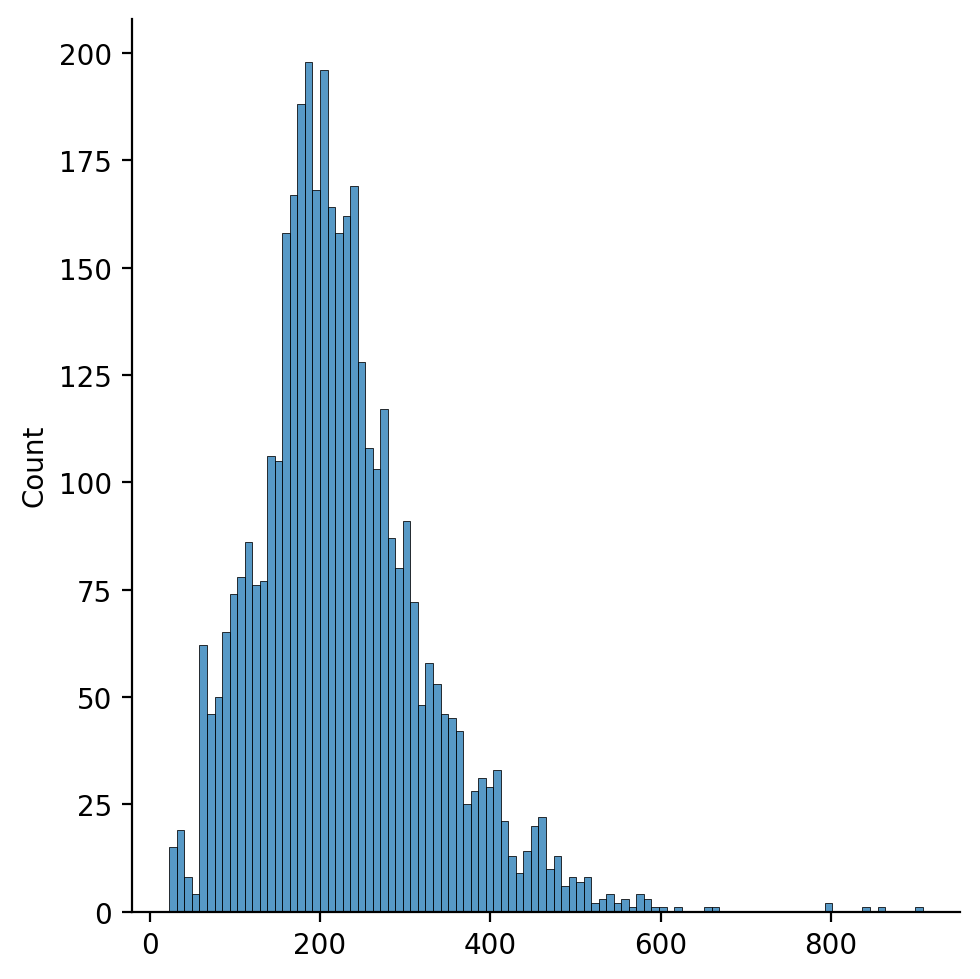

In [66]:
import seaborn as sns

#visualize the length of the songs

length = []
for song in dataset:
    length.append(len(song))
    
sns.displot(length, kde=False, bins=100)

In [69]:
import voicing as vc
voicing = vc.Voicing()


id = 999999
for i, data in enumerate(all_meta):
    if 'Giant Steps' in data['song_name']:
        id = i
        print(i)
        break




1474


In [71]:
import voicing as vc

#check the voicing conversion of all chords
from_ = id
to_ = id+1
myTracks = dataset[from_:to_]
sub_names = []
for names in all_meta[from_:to_]:
    sub_names.append(names['song_name'])
voicing = vc.Voicing()
midi_voicing = []


i = 0
for item in tqdm(myTracks):
    mv, status = voicing.convert_chords_to_voicing(item)
    midi_voicing.append(mv)
    if status == False:
        print(i, '\n', all_meta[i], '\n', item)
        break
    i += 1
print(len(midi_voicing))
print(sub_names)


100%|██████████| 1/1 [00:00<00:00, 2775.85it/s]

1
['Giant Steps']


In [73]:
id = 2503
print_this_song(all_meta, dataset, id)

{'composer': 'Arlindo Cruz/ Sombrinha/ Beto sem braço', 'style': 'Samba', 'song_name': 'Na Paz de Deus - iABABA', 'tonality': 'D major', 'midi_key': 14, 'time_signature': '4/4', 'decade': 'Null'}
0 <style>
1 Samba
2 |:
3 .
4 4.0
5 D
6 maj7
7 |
8 .
9 4.0
10 E
11 m7
12 |
13 .
14 4.0
15 A
16 dom7
17 |
18 .
19 4.0
20 D
21 maj7
22 :|
23 |
24 .
25 4.0
26 D
27 maj7
28 |
29 .
30 4.0
31 D
32 maj7
33 |
34 .
35 4.0
36 D
37 maj7
38 |
39 .
40 4.0
41 D
42 maj7
43 |
44 .
45 4.0
46 D
47 maj7
48 |
49 .
50 4.0
51 D
52 maj7
53 |
54 .
55 4.0
56 E
57 m7
58 |
59 .
60 2.6666666666666665
61 E
62 m7
63 .
64 1.3333333333333333
65 A
66 dom7
67 |
68 .
69 2.0
70 D
71 maj7
72 .
73 2.0
74 A
75 dom7
76 |
77 .
78 2.0
79 D
80 maj7
81 .
82 2.0
83 D#
84 o
85 |
86 .
87 4.0
88 E
89 m7
90 |
91 .
92 4.0
93 A
94 dom7
95 |
96 .
97 2.0
98 D
99 maj7
100 .
101 2.0
102 A
103 dom7
104 :|
105 |
106 Repeat_2
107 .
108 2.0
109 D
110 maj7
111 .
112 2.0
113 D#
114 o
115 |
116 .
117 2.0
118 E
119 m7
120 .
121 2.0
122 A
123 maj7
124 |
125

In [53]:
''' 
Extend the form of the song to complete at least 64 bars
'''

bars = []
for song in dataset:
    number_of_bars = 0
    for i, e in enumerate(song):
        if e == '|' or e == 'e||' or e == 'b||':
            number_of_bars += 1
    bars.append(number_of_bars)
    
print(len(bars))
print(bars)

repeat_times = 3
minimum = 64
new_dataset = []
for i, song in enumerate(dataset):
    new_song = []
    if bars[i] < minimum:
        #repeat the song again
        intro = song[0:2]
        s = song[2:]
        new_song = intro
        for i in range(repeat_times):
            new_song+=s
    
        new_dataset.append(new_song)
    else:
        new_dataset.append(song)

   

4006
[30, 32, 32, 27, 25, 37, 32, 22, 19, 23, 25, 34, 40, 23, 31, 20, 32, 30, 3, 30, 42, 36, 47, 28, 47, 32, 24, 3, 23, 41, 25, 25, 32, 25, 3, 54, 39, 29, 32, 56, 32, 23, 25, 37, 19, 7, 39, 36, 24, 24, 25, 22, 38, 24, 23, 44, 23, 32, 56, 55, 25, 16, 28, 34, 42, 28, 24, 32, 7, 23, 38, 32, 16, 36, 32, 22, 27, 23, 3, 20, 64, 10, 24, 24, 25, 34, 64, 53, 24, 35, 33, 33, 39, 40, 23, 38, 16, 26, 32, 32, 53, 40, 40, 32, 25, 32, 8, 27, 36, 36, 20, 20, 19, 33, 39, 28, 33, 45, 45, 42, 42, 55, 57, 20, 25, 25, 25, 41, 16, 35, 32, 24, 24, 26, 28, 28, 29, 29, 36, 23, 26, 83, 39, 32, 43, 32, 48, 32, 23, 31, 17, 27, 20, 20, 32, 33, 33, 10, 30, 32, 32, 33, 33, 24, 32, 32, 47, 32, 19, 27, 23, 38, 34, 45, 39, 36, 31, 32, 32, 38, 38, 32, 36, 34, 19, 41, 32, 55, 25, 41, 23, 27, 34, 31, 22, 29, 32, 32, 28, 31, 25, 34, 34, 32, 13, 46, 34, 34, 34, 34, 16, 16, 32, 35, 34, 20, 32, 35, 32, 21, 21, 25, 25, 13, 13, 34, 16, 25, 84, 18, 20, 39, 39, 40, 40, 41, 41, 42, 25, 24, 24, 31, 23, 28, 28, 32, 30, 30, 43, 37, 4

4006
[93, 102, 99, 84, 78, 123, 96, 60, 60, 72, 78, 108, 120, 72, 105, 60, 96, 90, 12, 87, 135, 114, 144, 84, 144, 96, 72, 12, 72, 126, 78, 78, 96, 78, 12, 162, 117, 90, 96, 174, 96, 72, 84, 114, 60, 24, 120, 108, 75, 72, 78, 66, 114, 75, 66, 132, 69, 96, 174, 168, 81, 54, 99, 108, 135, 84, 72, 96, 24, 69, 111, 96, 48, 108, 99, 69, 90, 72, 12, 66, 64, 36, 72, 72, 78, 123, 62, 162, 72, 102, 96, 96, 138, 120, 72, 108, 48, 78, 96, 96, 159, 120, 120, 96, 78, 96, 24, 87, 117, 117, 57, 57, 63, 102, 120, 84, 99, 144, 144, 132, 132, 165, 171, 72, 78, 78, 78, 138, 57, 111, 105, 75, 75, 81, 87, 87, 93, 93, 108, 72, 75, 85, 114, 96, 135, 96, 144, 96, 72, 96, 54, 78, 60, 60, 96, 102, 102, 30, 90, 96, 96, 102, 102, 72, 96, 96, 138, 96, 60, 84, 72, 117, 105, 135, 117, 108, 93, 96, 96, 111, 111, 96, 108, 102, 60, 126, 96, 168, 78, 129, 72, 81, 105, 90, 72, 90, 99, 99, 81, 96, 78, 102, 102, 96, 42, 150, 102, 102, 102, 102, 48, 48, 96, 99, 96, 63, 102, 99, 96, 69, 69, 78, 78, 42, 42, 105, 48, 84, 88, 6

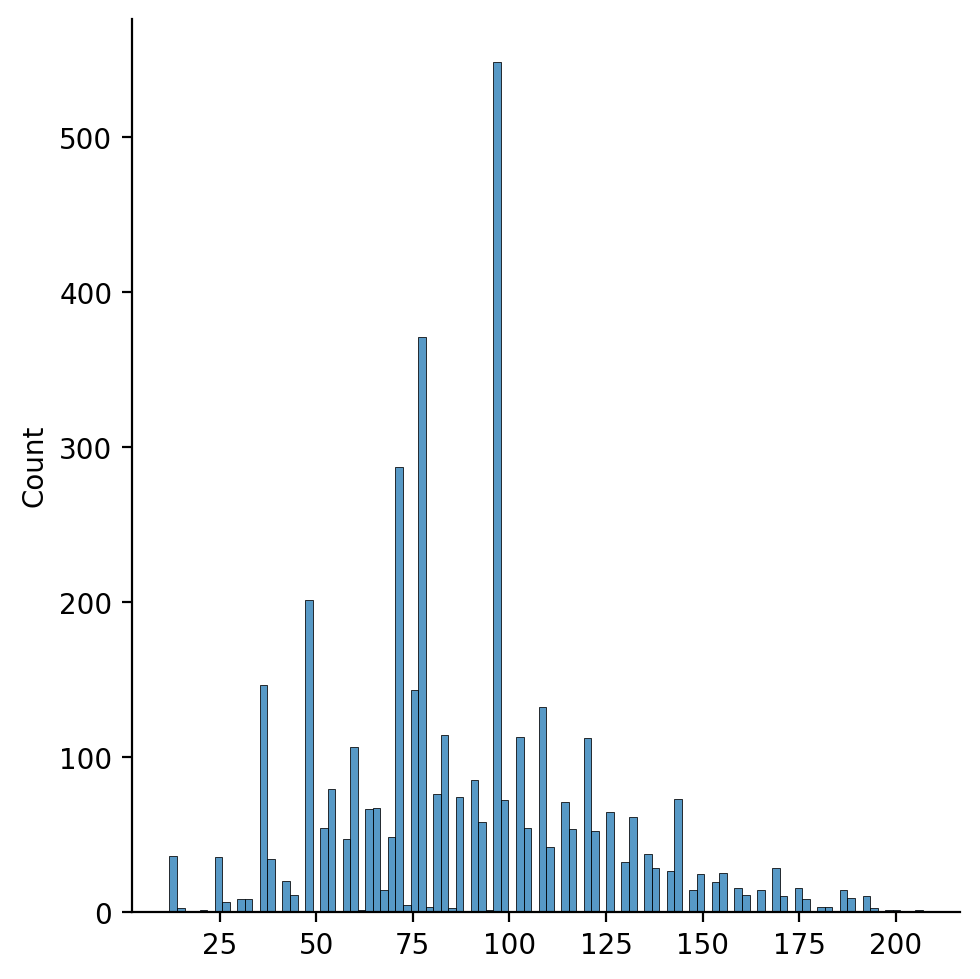

In [54]:
bars = []
for song in new_dataset:
    number_of_bars = 0
    for i, e in enumerate(song):
        if e[0] == '|' or e[0] == 'e||' or e[0] == 'b||':
            number_of_bars += 1
    bars.append(number_of_bars)
    
print(len(bars))
print(bars)

import seaborn as sns

#visualize the bars length of the songs
sns.displot(bars, kde=False, bins=100)

In [55]:
#check all tonalities
all_tonalities = [all_meta[i]['tonality'] for i in range(len(all_meta))]

all_tonalities = set(all_tonalities)
print(all_tonalities)

#get only the notes by splitting the tonalities
tonalities = [t.split(' ')[0] for t in all_tonalities]

#sort notes starting from A
tonalities = set(tonalities)
notes = sorted(tonalities, key=lambda x: (x, x[0]))
print(notes)


{'G major', 'Gb major', 'C minor', 'D minor', 'Eb minor', 'B minor', 'B major', 'D major', 'Bb major', 'C# minor', 'E minor', 'E major', 'Ab major', 'C major', 'F# minor', 'A major', 'F major', 'A minor', 'Eb major', 'Db major', 'G# minor', 'Bb minor', 'G minor', 'F minor'}
['A', 'Ab', 'B', 'Bb', 'C', 'C#', 'D', 'Db', 'E', 'Eb', 'F', 'F#', 'G', 'G#', 'Gb']


In [56]:
#Check songs after transposing test case

import transposition as tr
importlib.reload(tr)

transpose = tr.Transposition()

#id = 1474
#id = 4005
id = 256
song_to_transpose = new_dataset[id]
tonality = all_meta[id]['tonality']
song_name = all_meta[id]['song_name']

tonal = 'C'
new_song = transpose.transpose_song(song_to_transpose, tonality, tonal)

print(len(song_to_transpose), len(new_song))
print(song_to_transpose)
print(new_song)

458 458
['<style>', 'Medium Swing', 'Form_A', '|:', '.', '2.0', 'Eb', 'dom7', '.', '2.0', 'Bb', 'dom7', '|', '.', '4.0', 'Eb', 'dom7', '|', '.', '4.0', 'C', 'm', '|', '.', '4.0', 'C', 'm', '|', '.', '4.0', 'Eb', 'dom7', '|', '.', '4.0', 'Ab', 'dom7', '|', 'Repeat_1', '.', '4.0', 'F', 'm', '|', '.', '4.0', 'F', 'm', '/', 'Bb', ':|', '|', 'Repeat_2', '.', '2.0', 'F', 'm', '.', '2.0', 'Bb', 'dom7', '|', '.', '4.0', 'Eb', 'dom7', 'Form_B', '|', '.', '4.0', 'G', 'dom7', '|', '.', '4.0', 'G', 'dom7', '|', '.', '4.0', 'C', 'dom7', '|', '.', '4.0', 'C', 'dom7', '|', '.', '4.0', 'F', 'dom7', '|', '.', '4.0', 'F', 'dom7', '|', '.', '4.0', 'Bb', 'dom7', '|', '.', '4.0', 'Bb', 'dom7', 'Form_A', '|', '.', '2.0', 'Eb', 'dom7', '.', '2.0', 'Bb', 'dom7', '|', '.', '4.0', 'Eb', 'dom7', '|', '.', '4.0', 'C', 'm', '|', '.', '4.0', 'C', 'm', '|', '.', '4.0', 'Eb', 'dom7', '|', '.', '4.0', 'Ab', 'dom7', '|', '.', '4.0', 'F', 'm', '|', '.', '4.0', 'F', 'm', '/', 'Bb', 'Form_A', '|:', '.', '2.0', 'Eb', 'dom7

In [57]:
#Augment the dataset with all tonalities
import transposition as tr
transpose = tr.Transposition()

dataset_augmented = []
meta_augmented = []
tonalities = ['C', 'Db', 'D', 'Eb', 'E', 'F', 'Gb', 'G', 'Ab', 'A', 'Bb', 'B']

for i, song in enumerate(tqdm(new_dataset)):
    tonality = all_meta[i]['tonality']
    for tonal in tonalities:
        new_song = transpose.transpose_song(song, tonality, tonal)
        dataset_augmented.append(new_song)
        new_meta = all_meta[i].copy()
        info = tonality.split(' ')
        new_nature = info[1]
        new_meta['tonality'] = tonal + ' ' + new_nature
        meta_augmented.append(new_meta)

print(len(dataset_augmented), len(meta_augmented))

  0%|          | 0/4006 [00:00<?, ?it/s]

100%|██████████| 4006/4006 [01:07<00:00, 59.16it/s]

48072 48072


In [58]:
#Extract all MIDI arrays from the dataset, check the sizes and normalize its size to eight values
import voicing as vc
importlib.reload(vc)
voicing = vc.Voicing()

midi_voicing_dataset = []
for i, song in enumerate(tqdm(dataset_augmented)):
    mv, status = voicing.convert_chords_to_voicing(song)
    midi_voicing_dataset.append(mv)
    if status == False:
        print(i, '\n', meta_augmented[i], '\n', song)
        break
    
print(len(midi_voicing_dataset))


  0%|          | 0/48072 [00:00<?, ?it/s]

100%|██████████| 48072/48072 [01:18<00:00, 613.86it/s] 

48072


In [59]:
#Check particular cases to be sure MIDI voicing translation is correct

#Reload voicing and check the error
import voicing as vc
importlib.reload(vc)
voicing = vc.Voicing()


seq = [('<style>', 4.0), ('Jazz', 4.0), ('|', 4.0), ('.', 4.0), ('Eb', 4.0), ('maj7', 4.0), ('add #11', 4.0), ('add 13', 4.0),('/', 4.0), ('D', 4.0)]

import voicing as vc
voicing = vc.Voicing()

id = 1
test_this = new_dataset[id]
name = all_meta[id]['song_name']

path = '../data/midi_files/'
midi_v, _ = voicing.convert_chords_to_voicing(seq)

print(name)
for i, e in enumerate(midi_v):
    print(e)
    
#print(midi_v)

#voicing.export_to_midi(midi_v, name, path)

'Tain't No Sin To Take Off Your Skin
([0, 0, 0, 0, 0, 0, 0, 0], 0.0, ('<style>', 4.0))
([0, 0, 0, 0, 0, 0, 0, 0], 0.0, ('Jazz', 4.0))
([0, 0, 0, 0, 0, 0, 0, 0], 0.0, ('|', 4.0))
([0, 0, 0, 0, 0, 0, 0, 0], 0.0, ('.', 4.0))
([0, 0, 0, 0, 0, 0, 0, 0], 0.0, ('Eb', 4.0))
([0, 0, 0, 0, 0, 0, 0, 0], 0.0, ('maj7', 4.0))
([0, 0, 0, 0, 0, 0, 0, 0], 0.0, ('add #11', 4.0))
([0, 0, 0, 0, 0, 0, 0, 0], 0.0, ('add 13', 4.0))
([0, 0, 0, 0, 0, 0, 0, 0], 0.0, ('/', 4.0))
([0, 0, 0, 0, 0, 0, 0, 0], 0.0, ('D', 4.0))


In [60]:
id = 3732
correct = True
for n, song in enumerate(tqdm(midi_voicing_dataset)):
    for i, e in enumerate(song):
        m = e[0]
        if len(m) != 8:
            print("\nWrong sequence at: ------> ", n, i, '\n', e, len(m), '\n')
            id = n
            print_this_song(meta_augmented, midi_voicing_dataset, id)
            correct = False
            break
    if correct == False:
        break
        
if (correct): print('Test Completed Successfully!!!')

  0%|          | 0/48072 [00:00<?, ?it/s]

100%|██████████| 48072/48072 [00:07<00:00, 6169.40it/s]

Test Completed Successfully!!!


In [61]:
id = 22872
print(meta_augmented[id])
print(dataset_augmented[id])
print(midi_voicing_dataset[id])

for i, chord in enumerate(dataset_augmented[id]):
    midi = midi_voicing_dataset[id][i][0]
    #print(i, chord, midi)

{'composer': 'Strayhorn-Ellington', 'style': 'Medium Swing', 'song_name': 'Isfahan 1', 'tonality': 'C major', 'midi_key': 13, 'time_signature': '4/4', 'decade': 'Null'}
['<style>', 'Medium Swing', 'Form_A', '|', '.', '4.0', 'C', 'maj7', '|', '.', '2.0', 'A', 'maj7', '.', '2.0', 'A', 'dom7', '|', '.', '4.0', 'D', 'dom7', 'add 9', '|', '.', '4.0', 'D', 'dom7', 'add 9', '|', '.', '4.0', 'G#', 'maj7', '|', '.', '4.0', 'G', 'dom7', 'add 13', 'add b9', '|', '.', '4.0', 'C', 'maj7', '|', '.', '4.0', 'C', 'maj7', 'Form_B', '|', '.', '2.0', 'F#', 'm7', 'alter b5', 'add b9', '.', '2.0', 'B', 'dom7', 'alter b5', 'add b9', '|', '.', '4.0', 'E', 'm7', '|', '.', '2.0', 'G#', 'm7', 'alter b5', 'add b9', '.', '2.0', 'C#', 'dom7', 'alter b5', 'add b9', '|', '.', '4.0', 'F#', 'm7', '|', '.', '4.0', 'F#', 'm7', 'alter b5', '|', '.', '4.0', 'B', 'dom7', 'add b9', '|', '.', '2.0', 'E', 'maj7', '.', '2.0', 'D#', 'maj7', '|', '.', '2.0', 'D', 'maj7', '.', '2.0', 'C#', 'maj7', 'Form_A', '|', '.', '4.0', 'C', 

In [63]:
id = 6845
name = meta_augmented[id]['song_name']
the_song = midi_voicing_dataset[id]


#mv, status = voicing.convert_chords_to_voicing(new_song)
voicing.export_to_midi(the_song, name)

song: 111758_7_10_2024_Boogie Chillen No.2.mid
file: 111758_7_10_2024_Boogie Chillen No.2.txt
MIDI file created! 
---------------------------------


'111758_7_10_2024_Boogie Chillen No.2.mid'

In [64]:
#Save the files
import json

with open('../data/formatted/meta_dataset.txt', 'w') as jsonFile:
    json.dump(meta_augmented, jsonFile)
    
with open('../data/formatted/dataset_augmented.txt', 'w') as jsonFile:
    json.dump(dataset_augmented, jsonFile)
    
with open('../data/formatted/midi_voicing_dataset.txt', 'w') as jsonFile:
    json.dump(midi_voicing_dataset, jsonFile)

KeyboardInterrupt: 